##**libraries to be installed before going further**

In [ ]:
## for connecting the Gdrive with current notebook 

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install control
!pip install torch==1.7.0 

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE

#import control.matlab 
import matplotlib.pyplot as plt
import math as mt

#**Data loading from saved gdrive folders**



1.   click on folder icon on left side
2.   goto mydrive and go to your folder where data is saved
3. right click on that file and click on copy parth and paste like below      between the '  '.



In [ ]:
''' For data at operating condition '''

input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/orignal/1 input without noise.csv')
output = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/orignal/1 output without noise.csv')
disturbance = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/orignal/Random Disturbance.csv')
only_input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Only_manipulated_input.csv')
states_with_noise = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/orignal/True_states.csv')
plant_measurement_T = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/orignal/Plant_Measurement.csv')


''' for data at 40% reduction in heat of reaction operating value '''

# input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/HOR 78/1 input without noise.csv')
# output = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/HOR 78/1 output without noise.csv')
# disturbance = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/HOR 78/Random Disturbance.csv')
# only_input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Only_manipulated_input.csv')
# states_with_noise = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/HOR 78/True_states.csv')
# plant_measurement_T = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/HOR 78/Plant_Measurement.csv')

''' for data at 40% reduction in rate constant operating value '''

# input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/RK 60%/1 input without noise.csv')
# output = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/RK 60%/1 output without noise.csv')
# disturbance = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/RK 60%/Random Disturbance.csv')
# only_input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Only_manipulated_input.csv')
# states_with_noise = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/RK 60%/True_states.csv')
# plant_measurement_T = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/RK 60%/Plant_Measurement.csv')


#######################################################
'''
data generated by vinayak and we are just using it for calculation of errors
this is the data for physics based EKF generated on MATLAB
'''

estimated_using_1stprinciple = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/CSTR+-+State+estimation+using+1st+principle.csv')
#######################################################

input = np.asarray(input)
output = np.asarray(output)
disturbance = np.array(disturbance)
only_input = np.array(only_input)
plant_measurement_T = np.array(plant_measurement_T)
states_with_noise = np.array(states_with_noise)
estimated_using_1stprinciple = np.array(estimated_using_1stprinciple)

print('Length of the total dataset:',len(input))

#######################################################
'''
uncomment if you want to normalize the datasets
'''

#output[:,0] = 100*output[:,0]
#print(output)

# mean = input.mean(axis=0)
# std = input.std(axis=0)

# input = (input-mean)/std
# output[:,0] = (output[:,0]-mean[-2:][1])/std[-2:][1]
# output[:,1] = (output[:,1]-mean[-2:][0])/std[-2:][0]
# plant_measurement_T [:,0] = (plant_measurement_T [:,0]-mean[-2:][1])/std[-2:][1]
# plant_measurement_T [:,1] = (plant_measurement_T [:,1]-mean[-2:][0])/std[-2:][0]

#######################################################
'''
data is devided into train and test
'''


input_train = input[:15000]  
output_train = output[:15000]    
disturbance_train = disturbance[:15000]
onlyinput_train = only_input[:15000]
plantmeasurement_train = plant_measurement_T[:15000]
statewithnoise_train = states_with_noise[:15000]

input_test = input[15000:16666]
output_test = output[15000:16666]
disturbance_test = disturbance[15000:16666]
onlyinput_test = only_input[15000:16666]
plantmeasurement_test = plant_measurement_T[15000:16666]
statewithnoise_test = states_with_noise[15000:16666]

print('Length of the training set:',len(input_train),'\nLength of test set:',len(input_test))



Length of the total dataset: 19997
Length of the training set: 15000 
Length of test set: 1666


##**For knowing the shape of datasets**

In [ ]:
print('Input:',input_train.shape, type(input_train))
print('Output:',output_train.shape, type(output_train))
print('disturbance:',disturbance_train.shape,type(disturbance_train))
print('Only manipulated input:',onlyinput_train.shape,type(onlyinput_train))
print('Plant measurement:',plantmeasurement_train.shape,type(plantmeasurement_train))
print('Only manipulated input:',statewithnoise_train.shape,type(statewithnoise_train))

Input: (15000, 4) <class 'numpy.ndarray'>
Output: (15000, 2) <class 'numpy.ndarray'>
disturbance: (15000, 1) <class 'numpy.ndarray'>
Only manipulated input: (15000, 2) <class 'numpy.ndarray'>
Plant measurement: (15000, 2) <class 'numpy.ndarray'>
Only manipulated input: (15000, 2) <class 'numpy.ndarray'>


##**Function for creating batches**

In [ ]:
def Dataloader(seriesss,target,T):
     
     input_batches = []
     output_batches = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         input_batches.append(x)

         y = target[i+T-1]
         output_batches.append(y)

     input_batches = np.asarray(input_batches)
     output_batches = np.asarray(output_batches)

     input_batches = input_batches.reshape(-1,T,4)  # for creating 3 dimentional datasets
     output_batches = output_batches.reshape(-1,2)  # change when output length changes


     return input_batches,output_batches

##**creating batches for input and output datasets so that we can use inbult ANN function**



*   For inbuilt ANN model we have to give inputs in 3d manner ..if orignal sample is [1,4] then we have to give [1,1,4] where T=1

*   if T=10 (past 10 samples in case of RNN) then it becomes [10,1,4]


In [ ]:
T = 1
data = []
target = []

for item in range(len(input_train)-T):

    x = input_train[item:item+T]
    data.append(x)

    y = output_train[item+T-1]
    target.append(y)

data = np.asarray(data)
target = np.asarray(target)

print(data.shape, target.shape)

data = data.reshape(-1,T,4)
target = target.reshape(-1,2)   # use .reshape(-1,1) for predicting only temp

print('Shape of the dataloader:',data.shape,'\nShape of target variable', target.shape)

N = len(data)        # As now number of windows is equal to number of samples


(14999, 1, 4) (14999, 2)
Shape of the dataloader: (14999, 1, 4) 
Shape of target variable (14999, 2)


###**For using GPU**

goto runtime and there goto change runtime type and select the GPU and then run this code if you want faster training process

In [ ]:
# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


#**Artificial neural networks**

##**Model bulding**
###There are two ways given for model building 
both of them works well just the thing is for getting hidden outputs we created model using 2nd approach (it is usefull in EKF) and in 1st one we were not able to get the hidden layer values.

**1st approach**

In [ ]:
'''
class MLP(nn.Module):
  
    #Multilayer Perceptron for regression.
  
  torch.manual_seed(1)
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(4, 8),
      nn.ReLU(),
      nn.Linear(8, 8),
      nn.ReLU(),
      nn.Linear(8, 2)
    )


  def forward(self, x):

    #out_h2, out_h1 = self.layers(x)
    
      #Forward pass
    
    a = self.layers(x)
    return a

'''

'\nclass MLP(nn.Module):\n  \n    #Multilayer Perceptron for regression.\n  \n  torch.manual_seed(1)\n  def __init__(self):\n    super().__init__()\n    self.layers = nn.Sequential(\n      nn.Linear(4, 8),\n      nn.ReLU(),\n      nn.Linear(8, 8),\n      nn.ReLU(),\n      nn.Linear(8, 2)\n    )\n\n\n  def forward(self, x):\n\n    #out_h2, out_h1 = self.layers(x)\n    \n      #Forward pass\n    \n    a = self.layers(x)\n    return a\n\n'

**2nd approach**

In [ ]:
from collections import OrderedDict
torch.manual_seed(1)

model = nn.Sequential(OrderedDict([
                  ('in_h1', nn.Linear(4, 8)),
                  ('relu1', nn.ReLU()),
                  ('h1_h2', nn.Linear(8, 8)),
                  ('relu2', nn.ReLU()),
                  ('h2_out', nn.Linear(8, 2))]))


**For connecting model to GPU**

In [ ]:
# Instantiate the model
#model = MLP2() #changed to 2 when both state estimated
model.to(device)

Sequential(
  (in_h1): Linear(in_features=4, out_features=8, bias=True)
  (relu1): ReLU()
  (h1_h2): Linear(in_features=8, out_features=8, bias=True)
  (relu2): ReLU()
  (h2_out): Linear(in_features=8, out_features=2, bias=True)
)

##**Loss function and ADAM optimizer**

In [ ]:
# Loss and Optimizer
criterion = torch.nn.MSELoss()
opt = torch.optim.Adam(model.parameters() , lr = 0.00025)  # lr = learning rate

##**Train dataset is divided into train and validation sets**

In [ ]:
# train dataset

x_train = torch.from_numpy(input_train[:13333].astype(np.float32))
y_train = torch.from_numpy(output_train[:13333].astype(np.float32))

# validation dataset

x_test = torch.from_numpy(input_train[13333:].astype(np.float32))
y_test = torch.from_numpy(output_train[13333:].astype(np.float32))

x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

print(f' Train input set: {type(x_train), x_train.shape}, Test input: {type(x_test), x_test.shape} ')
print(f' Train target set: {type(y_train), y_train.shape}, Test target: {type(y_test), y_test.shape} ')

 Train input set: (<class 'torch.Tensor'>, torch.Size([13333, 4])), Test input: (<class 'torch.Tensor'>, torch.Size([1667, 4])) 
 Train target set: (<class 'torch.Tensor'>, torch.Size([13333, 2])), Test target: (<class 'torch.Tensor'>, torch.Size([1667, 2])) 


##**Training of the model**

In [ ]:
def fullgd (x_train,y_train, x_test,y_test,epochs,model,criterion,opt):
    loss_train = []
    loss_test = []

    for epoch in range(epochs):

        opt.zero_grad()    # making gradients zero at every iteration so that we calculate fresh gradients with respect to new loss calculated

        output = model(x_train)  # model predictions

        loss = criterion(output, y_train)  # calculating loss

        loss.backward()  # calculating gradients with respect to all the weights and biases

        opt.step()    # applying adam optimizer for weights and bias update

        loss_train.append(loss.item())  # collecting loss values for plotting

        with torch.no_grad():  # not calculating gradients for validation datasets so that we can know the predictions error for validation dataset

            testoutput = model(x_test)  # model prediction for validation input
          
            losstest = criterion(testoutput,y_test) 
            loss_test.append(losstest.item())
            
            if (epoch+1)%500 == 0:

                print(f'Epoch: {epoch+1}/{epochs}, Train loss:{loss.item(): .4f}, Test loss:{losstest.item(): .4f}')

    return loss_train,loss_test


In [ ]:
epochs = 210000   # selecting number of epochs for training 

loss_train,loss_test =fullgd(x_train,y_train,x_test,y_test,epochs,model,criterion,opt)  # appying training function mentioned above

**Plotting the error vs epoch for model training**

In [ ]:
plt.plot(loss_train[:1500], label='train')
plt.plot(loss_test [:1500], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('Loss vs 1500 epochs ')
plt.legend()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x')
plt.savefig('Loss vs 1500 Epochs.png',dpi=200,bbox_extra_artists=(lgd,), bbox_inches='tight')

##**Model saving and weights saving**

In [ ]:
#saving entire model with trained weights and biases for later on uses withought training the model again

torch.save(model, 'model_ANN_new.pth')


**Loading the trained model so that we dont have to train the model again and again**

In [ ]:
#loading entire model
# add ,map_location=torch.device('cpu') after '  ' if you are not using GPU

#model = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/weights/ANN_orignal_new _model/model_ANN_new.pth',map_location=torch.device('cpu'))
model = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/model_ANN_new.pth')

model.to(device)
print(model)

Sequential(
  (in_h1): Linear(in_features=4, out_features=8, bias=True)
  (relu1): ReLU()
  (h1_h2): Linear(in_features=8, out_features=8, bias=True)
  (relu2): ReLU()
  (h2_out): Linear(in_features=8, out_features=2, bias=True)
)


**collecting weights from trained model**

In [ ]:
## WEIGHTS AND BIAS FOR OUTPUT LAYER
w_in_h1, b_in_h1,w_h1_h2,b_h1_h2,w_h2_out,b_h2_out = model.parameters()

In [ ]:

print('w_in_h1 :',w_in_h1)
print('b_in_h1 :',b_in_h1)
print('w_h1_h2 :',w_h1_h2)
print('b_h1_h2 :',b_h1_h2)
print('w_h2_out :',w_h2_out)
print('b_h2_out :',b_h2_out)


w_in_h1 : Parameter containing:
tensor([[ 0.2576, -0.2207, -0.0969,  0.2347],
        [-0.4707,  0.2999, -0.1029,  0.2544],
        [-0.1141, -0.2448,  0.2186, 18.2030],
        [ 0.1826, -0.1949, -0.0365, -0.0450],
        [-0.3179, -0.3924,  0.4032, 19.6519],
        [-0.1862, -0.3020, -0.0838, -0.2157],
        [-0.3585, -0.1744,  0.3785, 20.3932],
        [-0.6374,  0.1613,  0.2233, 19.4619]], device='cuda:0',
       requires_grad=True)
b_in_h1 : Parameter containing:
tensor([ 0.3300, -0.4556, -0.4418, -0.2412,  0.3686, -0.0833,  0.2470, -0.1958],
       device='cuda:0', requires_grad=True)
w_h1_h2 : Parameter containing:
tensor([[ 0.3469, -0.1496,  0.2651,  0.0042, -0.1863,  0.1817, -0.1877,  0.1040],
        [-0.1021, -0.0388,  0.1659, -0.1686,  0.5281, -0.0859,  0.7141,  0.7772],
        [-0.0166, -0.2360,  0.6266,  0.1097,  0.0294,  0.2296,  0.5020,  0.7152],
        [-0.1982, -0.0582, -0.0068,  0.0516, -0.2683, -0.2509,  0.1923, -0.0829],
        [ 0.1727,  0.0202,  0.5267,  0

**uncomment if you want to save the weights after training the model for different uses**

In [ ]:

# torch.save(w_in_h1,'w_in_h1.pt')
# torch.save(b_in_h1,'b_in_h1.pt')
# torch.save(w_h1_h2,'w_h1_h2.pt')
# torch.save(b_h1_h2,'b_h1_h2.pt')
# torch.save(w_h2_out,'w_h2_out.pt')
# torch.save(b_h2_out,'b_h2_out.pt')


**Uncomment to upload the weights and trained model in your Gdrive folder**

In [ ]:

# !pip install --upgrade gupload

# from pydrive.auth import GoogleAuth
# from google.colab import auth

# # Authenticate and create the PyDrive client.
# auth.authenticate_user()

'''
'1a04yAuMQELuAC8-tM6UarEQ1aegjrjS0'

this kind of code you will get from the Gdrive folder in which you want to upload weights and model

code will change with different folders

you can get this by right click on Gdrive folder and goto share link option from there you just have to copy the codes like mentioned above from whole link
'''

# #for uploading all the weights
# !gupload --to '1a04yAuMQELuAC8-tM6UarEQ1aegjrjS0' *.pt   

## for uploading the trained model
# !gupload --to '1a04yAuMQELuAC8-tM6UarEQ1aegjrjS0' model_ANN_new.pth    



##**Training dataset predictions**

In [ ]:
# creating datasets

_, True_states = Dataloader(input_train,statewithnoise_train,1)
True_states2 = True_states[:13333]

0.01168766
0.37684157
0.03205060725245878
2.954010870171771


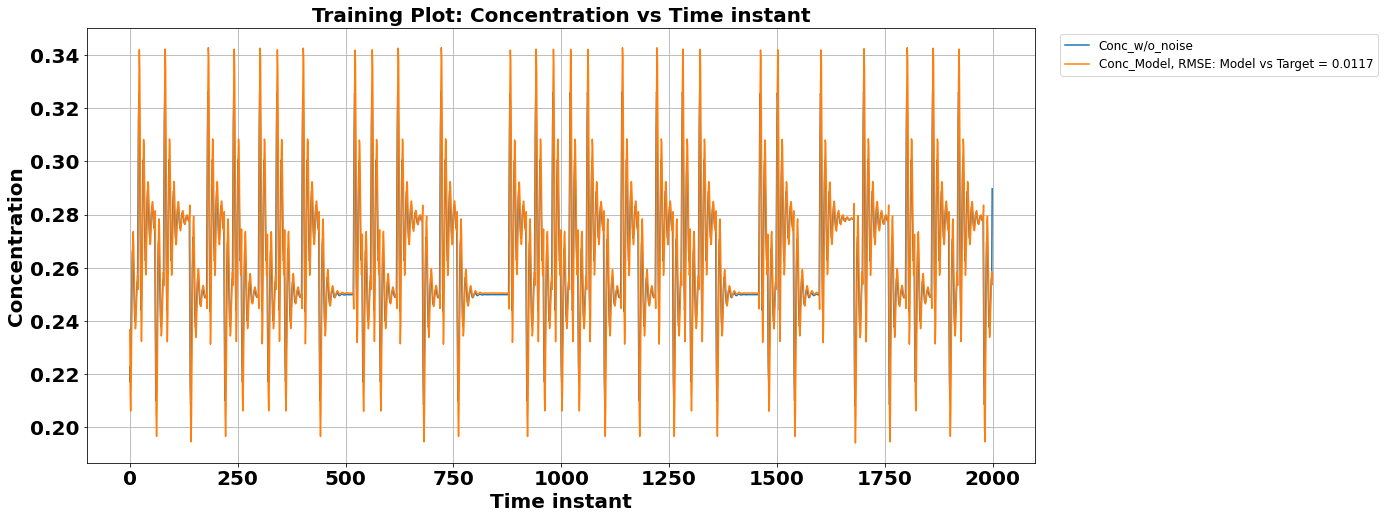

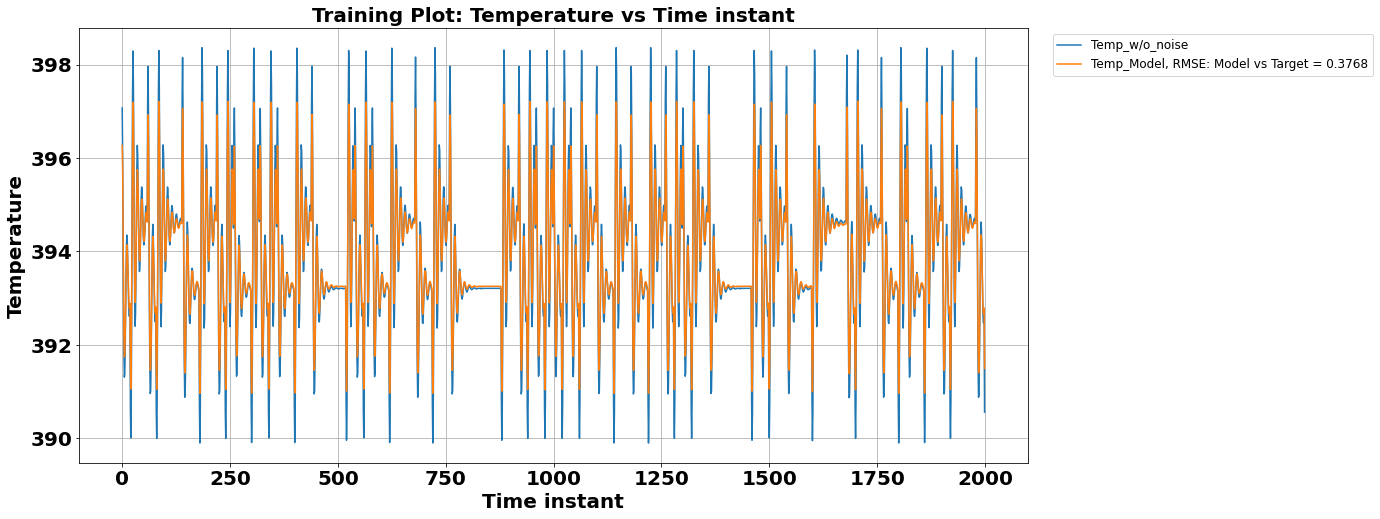

In [ ]:

true = y_train.detach().cpu().numpy()  # we detach the datasets from GPU if we want to plot them 

checktrain = x_train

p_result = model(checktrain)
p = p_result.cpu().detach().numpy()   # we detach the datasets from GPU if we want to plot them

########################## calculating errors ############################

error_train_conc = MSE(true[:,0],p[:,0])
error_train_temp = MSE(true[:,1],p[:,1])
error_train_conc2 = MSE(True_states2[:,0],p[:,0])
error_train_temp2 = MSE(True_states2[:,1],p[:,1])

error_train_conc_graph = true[:,0]-p[:,0]
error_train_temp_graph = true[:,1]-p[:,1]
error_train_conc2_graph = True_states2[:,0]-p[:,0]
error_train_temp2_graph = True_states2[:,1]-p[:,1]

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))

print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))

############################## plotting the prediction VS target values ####################################

x = np.arange(0,len(checktrain[2000:4000]))
plt.figure(figsize=(17,8))
plt.plot(x,true[2000:4000,0], label='Conc_w/o_noise')
plt.plot(x, p[2000:4000,0], label='Conc_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_conc)))
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Training Plot: Concentration vs Time instant',fontsize=20, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x')
#plt.savefig('Training Plot: Concentration vs Time instant.png',dpi=200,bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.figure(figsize=(17,8))
plt.plot(x,true[2000:4000,1], label='Temp_w/o_noise')
plt.plot(x, p[2000:4000,1], label='Temp_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_temp)))
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Training Plot: Temperature vs Time instant',fontsize=20, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x')
#plt.savefig('Training Plot: Temperature vs Time instant.png',dpi=200,bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
loss = criterion (p_result,y_train)
loss

tensor(0.0711, grad_fn=<MseLossBackward0>)

##**Validation dataset predictions**

In [ ]:
validating_target = y_test.detach().cpu().numpy()

validating_predictions = []
i=0

while len(validating_predictions)<len(validating_target):

    input_ = x_test[i].view(1,T,4)    # convert the x_test[i] which is 2d to 3d
    p = model(input_)

    j= np.array(p[0].detach().cpu())

    validating_predictions.append(j)

    i+=1

validating_predictions = np.array(validating_predictions).reshape(-1,2)
# validating_predictions = np.asarray(validating_predictions)
print(validating_predictions.shape)
print(validating_target.shape)

(1667, 2)
(1667, 2)


0.011254922
0.36279124
0.031205040524533524
3.0410748448986937


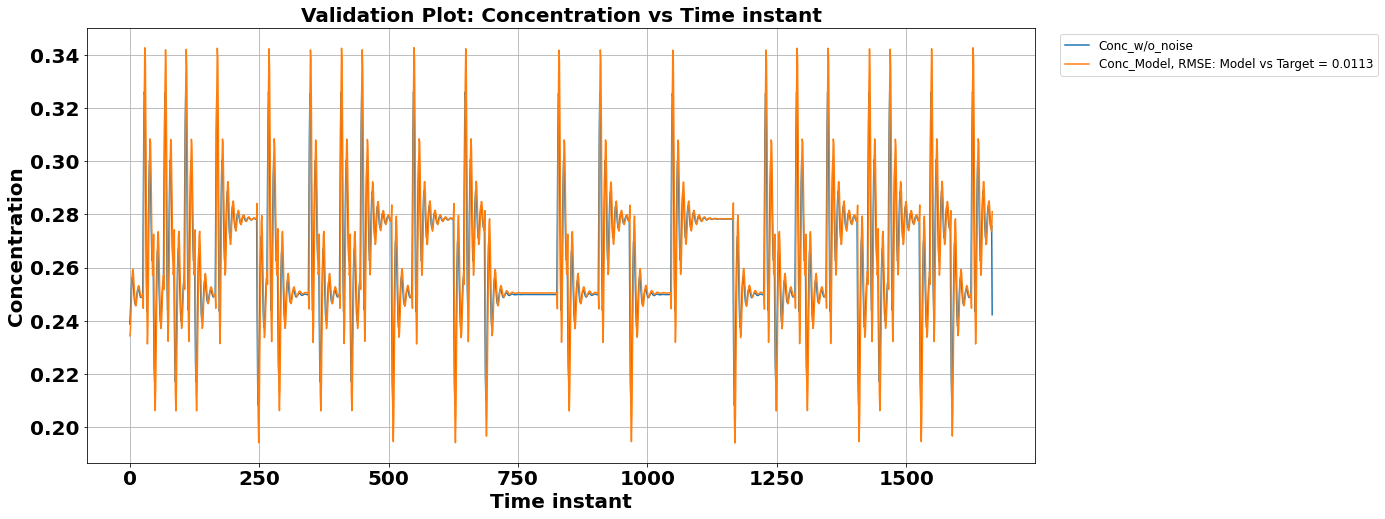

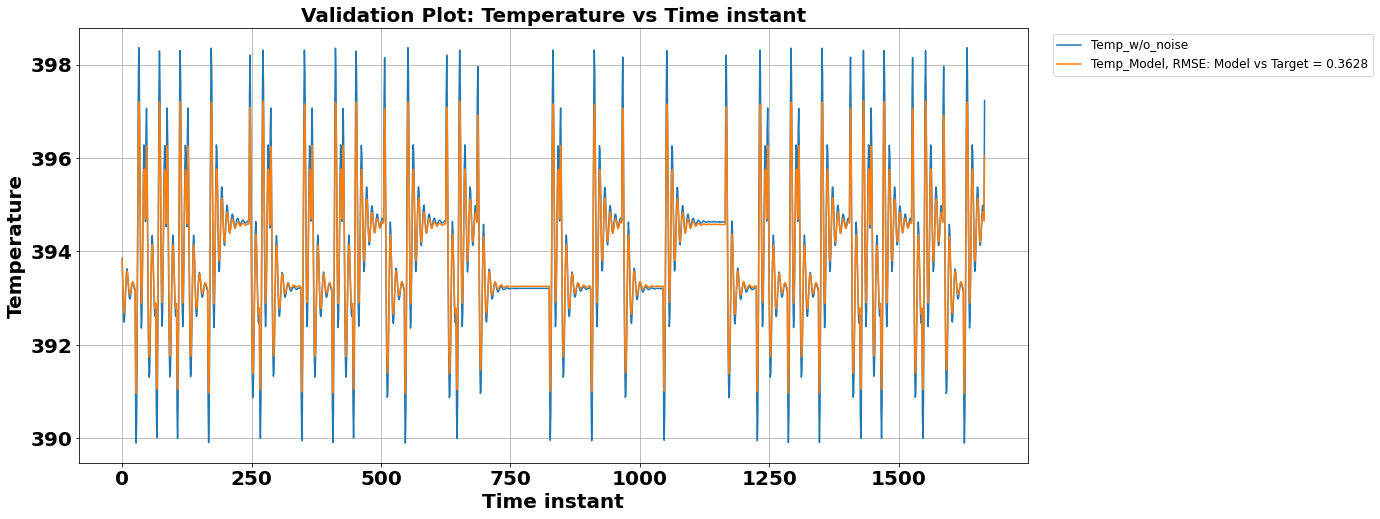

In [ ]:
_, True_states = Dataloader(input_train,statewithnoise_train,T)
True_states2 = True_states[13333:]
True_states2[:,0] = True_states2[:,0]

error_train_conc = MSE(validating_target[:,0],validating_predictions[:,0])
error_train_temp = MSE(validating_target[:,1],validating_predictions[:,1])
error_train_conc2 = MSE(True_states2[:,0],validating_predictions[1:,0])
error_train_temp2 = MSE(True_states2[:,1],validating_predictions[1:,1])

error_train_conc_graph = validating_target[:,0]-validating_predictions[1:,0].reshape(-1,1)
error_train_temp_graph = validating_target[:,1]-validating_predictions[1:,1].reshape(-1,1)
error_train_conc2_graph = True_states2[:,0]-validating_predictions[1:,0].reshape(-1,1)
error_train_temp2_graph = True_states2[:,1]-validating_predictions[1:,1].reshape(-1,1)

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))




x = np.arange(0,len(validating_target[:,0]))

plt.figure(figsize=(17,8))
plt.plot(x,validating_target[:,0], label='Conc_w/o_noise')
plt.plot(x,validating_predictions[:,0], label='Conc_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_conc)))
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Validation Plot: Concentration vs Time instant',fontsize=20, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x')
#plt.savefig('Validation Plot: Concentration vs Time instant.png',dpi=200,bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.figure(figsize=(17,8))
plt.plot(x,validating_target[:,1], label='Temp_w/o_noise')
plt.plot(x,validating_predictions[:,1],label='Temp_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_temp)))
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Validation Plot: Temperature vs Time instant',fontsize=20, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x')
#plt.savefig('Validation Plot: Temperature vs Time instant.png',dpi=200,bbox_extra_artists=(lgd,), bbox_inches='tight')


##**Test data predictions**

In [ ]:
input_test = torch.from_numpy(input_test.astype(np.float32)).to(device)

In [ ]:
validating_target = output_test

validating_predictions = []
i=0
T = 1
while len(validating_predictions)<len(validating_target):

    input_ = input_test[i].reshape (1,1,4)   # convert the x_test[i] which is 2d to 3d
    p = model(input_)

    j= np.array(p[0].detach().cpu())

    validating_predictions.append(j)

    i+=1

validating_predictions = np.array(validating_predictions).reshape(-1,2)
# validating_predictions = np.asarray(validating_predictions)
print(validating_predictions.shape)
print(validating_target.shape)

(1666, 2)
(1666, 2)


In [ ]:

True_states2 = statewithnoise_test

error_train_conc = MSE(validating_target[:,0],validating_predictions[:,0])
error_train_temp = MSE(validating_target[:,1],validating_predictions[:,1])
error_train_conc2 = MSE(True_states2[:,0],validating_predictions[:,0])
error_train_temp2 = MSE(True_states2[:,1],validating_predictions[:,1])

error_train_conc_graph = validating_target[:,0]-validating_predictions[:,0].reshape(-1,1)
error_train_temp_graph = validating_target[:,1]-validating_predictions[:,1].reshape(-1,1)
error_train_conc2_graph = True_states2[:,0]-validating_predictions[:,0].reshape(-1,1)
error_train_temp2_graph = True_states2[:,1]-validating_predictions[:,1].reshape(-1,1)

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))

0.011149411425485476
0.3603375568595243
0.03044587784608529
2.8343182450251216


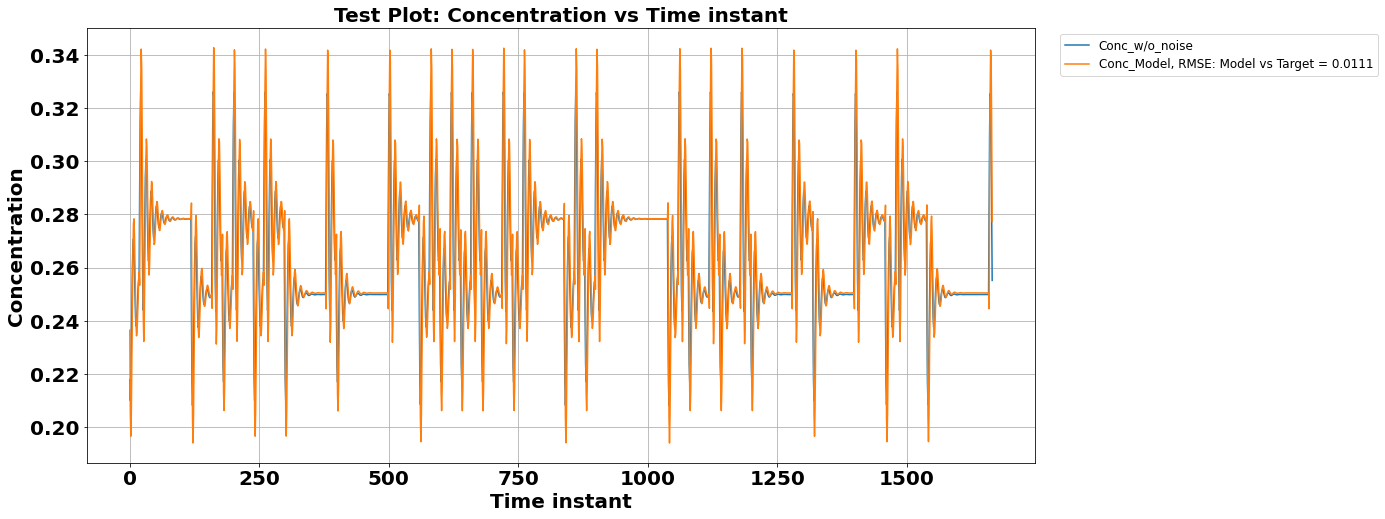

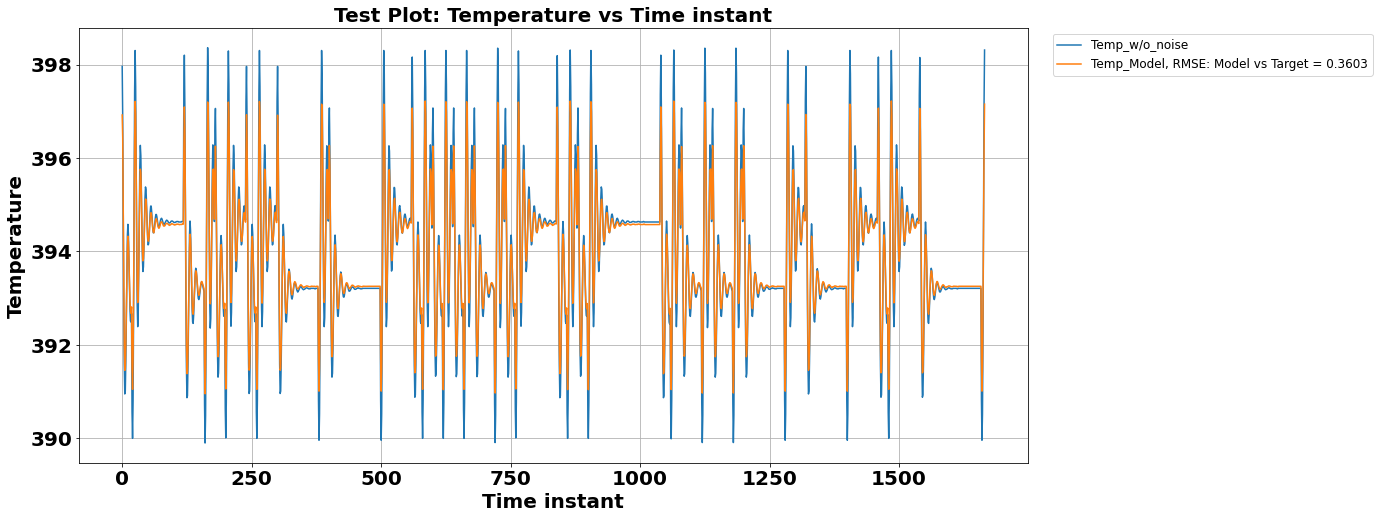

In [ ]:

x = np.arange(0,len(validating_target[:,0]))

plt.figure(figsize=(17,8))
plt.plot(x,validating_target[:,0], label='Conc_w/o_noise')
plt.plot(x,validating_predictions[:,0], label='Conc_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_conc)))
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Test Plot: Concentration vs Time instant',fontsize=20, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x')
#plt.savefig('Test Plot: Concentration vs Time instant.png',dpi=200,bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.figure(figsize=(17,8))
plt.plot(x,validating_target[:,1], label='Temp_w/o_noise')
plt.plot(x,validating_predictions[:,1],label='Temp_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_temp)))
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Test Plot: Temperature vs Time instant',fontsize=20, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x')
#plt.savefig('Test Plot: Temperature vs Time instant.png',dpi=200,bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
validating_target = torch.from_numpy(validating_target)
validating_predictions = torch.from_numpy(validating_predictions)

loss = criterion (validating_target,validating_predictions)
loss

tensor(0.0650, dtype=torch.float64)

#**True states prediction with ANN-EKF**

###**EKF function**

In [ ]:

def EKF(x_pred, cov_est, u, yk, d,hidden1,hidden2) :

    n_st =2
    n_op = 1
    n_ip=2

    # Using hidden layer weights and stae input weights for updating the phi matrix at each iteration

    bb = W_states_input.copy()
    aa = w_h1_h2.copy()
    cc = w_h2_out.copy()
    # aa is 8*8 matrix
    # bb is 8*2 matrix
    # cc is 2*8 matrix

    Q = np.diagflat([0.012**2,0.012**2])    # for 2 states

    #R = 0.15**2      ##  if measurement is temperature state
    R = np.diag([0.01**2 ,0.15**2])   ## if concentration and temperature both are measured states

    #C = [0,1]   # if measurement is temperature state

    ## if concentration and temperature both are measured states
    C= np.zeros((2,2))
    C[0][0]=1
    C[1][1]=1                                                                                                                           

    C = np.array(C)
    C = np.mat(C) 

    x_pred = x_pred.reshape(n_st,1)

    yk = yk.reshape(2,1)   ## if concentration and temperature both are measured states
    #yk = yk.reshape(1,1)  # if measurement is temperature state

    u = u.reshape(n_ip,1)
    d= d.reshape(1,1)


###############################  FOR CHECKING IF HIDDEN weight VALUE is 0 THEN MAKE CHANGES IN PHI ################
########################################### PHi from ANN ################################

    
    for i in range(len(hidden1[0])):

        if hidden1[0][i]==0:
          for j in range(2):
              bb[i][j]=0

    for i in range(len(hidden2[0])):

      if hidden2[0][i]==0:
          for j in range(8):
              aa[i][j]=0

    a = np.dot(aa,bb)
    phi_EKF = np.dot(cc,a)

######################################################################################

    C_lin = C
    
    cov_pred = np.dot(phi_EKF,np.dot(cov_est,phi_EKF.T))

    # gamma_bd*Q*gamma_bd.T   this part is zero , explanation is given in thesis


    kgain = np.dot(C_lin,np.dot(cov_pred,C_lin.T)) + R
    inv_kgain = kgain.I  

    K_gain = np.dot(cov_pred,np.dot(C_lin.T,inv_kgain))

    y_pred = np.dot(C_lin,x_pred)

    y_pred = y_pred.reshape(2,1)  ## if concentration and temperature both are measured states
    #y_pred = y_pred.reshape(1,1) # if measurement is temperature state

    x_est = x_pred + np.dot(K_gain,(yk - y_pred))
    cov_est = cov_pred - np.dot(K_gain, np.dot(C_lin,cov_pred))
              
    return x_est, cov_est




#data generation

In [ ]:
T = 1
def Dataloader(seriesss,target,disturbance1,mani_input,plant,mech_EKF,T):
     
     data4 = []
     output = []
     d = []
     minput = []
     pmeasurement = []
     result_1stEKF = []

     for i in range(len(seriesss)-T):
         #x = seriesss[i:i+T]
         #data4.append(x)

         y = target[i+T-1]
         output.append(y)

         z = disturbance1[i+T-1]
         d.append(z)

         w = mani_input[i+T-1]
         minput.append(w)

         v = plant[i+T-1]
         pmeasurement.append(v)

         f = mech_EKF[i+T-1]
         result_1stEKF.append(f)


     data4 = np.asarray(seriesss[:-1,:])

     output = np.asarray(output)

     d = np.asarray(d)

     minput = np.asarray(minput)

     pmeasurement = np.asarray(pmeasurement)

     result_1stEKF = np.asarray(result_1stEKF)



     data4 = data4.reshape(1665,T,4)
     output = output.reshape(-1,2) 
     d = d.reshape(-1,1)
     minput = minput.reshape(-1,2)
     pmeasurement = pmeasurement.reshape(-1,2)  ## if concentration and temperature both are measured states
     #pmeasurement = pmeasurement.reshape(-1,1) # if measurement is temperature state
     result_1stEKF = result_1stEKF.reshape(-1,2)

     return data4,output,d,minput,pmeasurement,result_1stEKF

## preparing data

In [ ]:


inputnew, true_states, disturbancenew, minputnew, measured_states, mech_EKF_result = Dataloader(input_test, statewithnoise_test, disturbance_test, onlyinput_test,plantmeasurement_test,estimated_using_1stprinciple,T)

print('Disturbance shape:',disturbancenew.shape, type(disturbancenew))
print('Manipulated input shape:',minputnew.shape, type(minputnew))
print('Input shape:', inputnew.shape, type(inputnew))
print('Output shape:', true_states.shape, type(true_states))
print('plant measurement shape:', measured_states.shape, type(measured_states))
print('1st principle estimation shape:', mech_EKF_result.shape, type(measured_states))
print('\n')

print(inputnew.shape,true_states.shape)
print('\nType of input data:',type(inputnew))

inputnew = torch.from_numpy(inputnew.astype(np.float32))
print('\nType of input data:',type(inputnew))
print('\nType of output data:',type(true_states))

inputnew = inputnew.to(device)

Disturbance shape: (1665, 1) <class 'numpy.ndarray'>
Manipulated input shape: (1665, 2) <class 'numpy.ndarray'>
Input shape: (1665, 1, 4) <class 'numpy.ndarray'>
Output shape: (1665, 2) <class 'numpy.ndarray'>
plant measurement shape: (1665, 2) <class 'numpy.ndarray'>
1st principle estimation shape: (1665, 2) <class 'numpy.ndarray'>


(1665, 1, 4) (1665, 2)

Type of input data: <class 'numpy.ndarray'>

Type of input data: <class 'torch.Tensor'>

Type of output data: <class 'numpy.ndarray'>


##**Creating initial PHI matrix from weight matrices**

In [ ]:
w_in_h1, b_in_h1,w_h1_h2,b_h1_h2,w_h2_out,b_h2_out = model.parameters() # loading all weights and biases


w_in_h1 =w_in_h1.cpu().detach().numpy() # weights between input - 1st hidden layer
w_h1_h2 = w_h1_h2.cpu().detach().numpy() # weights between 1st hidden layer - 2nd hidden layer
w_h2_out = w_h2_out.cpu().detach().numpy() # weights between 2nd hidden layer - output layer

W_states_input =w_in_h1[:,2:]  # weights between input state neurons and 1st hidden layer

W_hidden2_xy = np.dot(w_h1_h2,W_states_input)

w_final_xy = np.dot(w_h2_out,W_hidden2_xy)   # this is phi and formulation given in thesis chapter 4

#**EKF implementation**

In [ ]:

import time

# Grab Currrent Time Before Running the Code
start = time.time()

model_predictions = []
updated_predictions = []

cov_est = np.diagflat([0.0001,0.0001])     # initial covariance matrix

last_x = inputnew[0]  # taking 1st sample to start the ANN-EKF


################################################ ######

phi_test = w_final_xy.copy()   # initial PHI MAtrix

i=0
T = 1

while len(model_predictions)<(len(true_states)-1):

    u = minputnew[i]
    d = disturbancenew[i]
    d = np.array(d)
    yk = measured_states[i]

    i = i+1
    input_ = last_x.reshape(1,T,4)    # done as input needs 3 dimension (needs 1 as batch dimension too !!)

    a = model[0](input_)
    hidden1 = model[1](a)  # output from 1st hidden layer

    c = model[2](hidden1)
    hidden2 = model[3](c)  # output from 2nd hidden layer

    p = model[4](hidden2)
    p = p[0][0].cpu().detach().numpy()   # output from whole model

    
#################################

    hidden1= hidden1[0].cpu().detach().numpy()
    hidden2 = hidden2[0].cpu().detach().numpy()
    
##################################

    test2=[]

    for item in p:
        
        test2.append(item)
    
    x_pred= np.array(test2)  # predicted states from model

    x_est, cov_est  = EKF(x_pred,cov_est,u,yk,d,hidden1,hidden2)  # appying EKF function for state estimation
 
    x_est = np.array(x_est)  # filtered states from ANN-EKF

    updated_predictions.append(x_est.reshape(-1,2))  # storing the filtered states

    cov_est = np.array(cov_est)  # updated covariance matrix

    dummy = torch.from_numpy(x_est.T.astype(np.float32)) # just a variable 

    model_predictions.append(x_pred)

    last_x[0][0] = inputnew[i][0,0]  # taking next time instance manipulated variable
    last_x[0][1] = inputnew[i][0,1]   # taking next time instance manipulated variable

    last_x[0][2] = dummy[0,1]      # replacing T(k-1/k-1) with T(k/k)
    last_x[0][3] = dummy[0,0]      # replacing C(k-1/k-1) with C(k/k)

end = time.time()

#Subtract Start Time from The End Time
total_time = end - start
print("\n"+ str(total_time))


0.9041564464569092


**Just reshaping the collected datasets**

In [ ]:
updated_predictions2 = np.array(updated_predictions)
model_predictions2 = np.array(model_predictions)
print('Shape of EKF prediction:',updated_predictions2.shape)
print('Shape of model prediction:',model_predictions2.shape)

updated_predictions2 = updated_predictions2.reshape(-1,2)
model_predictions2 = model_predictions2.reshape(-1,2)
print('Shape of EKF prediction reshape:',updated_predictions2.shape)
print('Shape of model prediction reshape:',model_predictions2.shape)

Shape of EKF prediction: (1664, 1, 2)
Shape of model prediction: (1664, 2)
Shape of EKF prediction reshape: (1664, 2)
Shape of model prediction reshape: (1664, 2)


In [ ]:
print('concentration: ',updated_predictions2[100:120,0],'Temperature: ',updated_predictions2[100:120,1],sep = '\n')

concentration: 
[0.2790042  0.30686073 0.29738346 0.31057296 0.26642106 0.25743285
 0.2582555  0.2628438  0.26976438 0.27636335 0.28412616 0.29383072
 0.3000262  0.29018951 0.27141113 0.27834814 0.28352496 0.27595939
 0.27237266 0.27237281]
Temperature: 
[391.16283464 392.00600533 393.8744833  395.91793844 396.86355379
 396.91891406 396.01528692 394.12438371 393.97304219 393.07091441
 393.92609185 394.04018346 394.07291634 395.86426708 395.9642992
 395.99787236 396.01942589 395.99473053 396.8911061  399.8236448 ]


##**RMSE calculation for ANN-EKF**

In [ ]:
time = np.arange(0,len(updated_predictions2[610:625,0]))

error_conc_EKF = MSE(true_states[:1665-T,0],updated_predictions2[:1665-T,0])
error_conc_Model = MSE(true_states[:1665-T,0],model_predictions2[:,0])

error_temp_EKF = MSE(true_states[:1665-T,1],updated_predictions2[:1665-T,1])
error_temp_Model = MSE(true_states[:1665-T,1],model_predictions2[:,1])
error_temp_Measurement = MSE(true_states[:1665-T,1],measured_states[:1665-T,0])

error_conc_EKF_graph = true_states[:1665-T,0]-updated_predictions2[:1665-T,0]
error_conc_Model_graph = true_states[:1665-T,0]-model_predictions2[:,0]
error_temp_EKF_graph = true_states[:1665-T,1]-updated_predictions2[:1665-T,1]
error_temp_Model_graph = true_states[:1665-T,1]-model_predictions2[:,1]
error_temp_Measurement_graph = true_states[:1665-T,1]-measured_states[:1665-T,0]


error_conc_PhyEKF = MSE(true_states[:1665-T,0],mech_EKF_result[:1665-T,0])
error_temp_PhyEKF = MSE(true_states[:1665-T,1],mech_EKF_result[:1665-T,1])

RMSE_phyEKF_conc = np.sqrt(error_conc_PhyEKF)
RMSE_phyEKF_temp = np.sqrt(error_temp_PhyEKF)

RMSE_EKF_conc = np.sqrt(error_conc_EKF)
RMSE_EKF_temp = np.sqrt(error_temp_EKF)

print('error_conc_EKF',np.sqrt(error_conc_EKF))
print('error_conc_Model',np.sqrt(error_conc_Model))
print('error_temp_EKF',np.sqrt(error_temp_EKF))
print('error_temp_Model',np.sqrt(error_temp_Model))
print('error_temp_Measurement',np.sqrt(error_temp_Measurement))

print('\n')
print(RMSE_phyEKF_conc)
print(RMSE_phyEKF_temp)

error_conc_EKF 0.018620615275410188
error_conc_Model 0.04001232893784171
error_temp_EKF 0.3477160592192481
error_temp_Model 0.8722058401377009
error_temp_Measurement 393.73912567487514


0.02917786122863367
2.9253173418418683


#**DIfferent plots**

###**True states VS Filtered states plots**

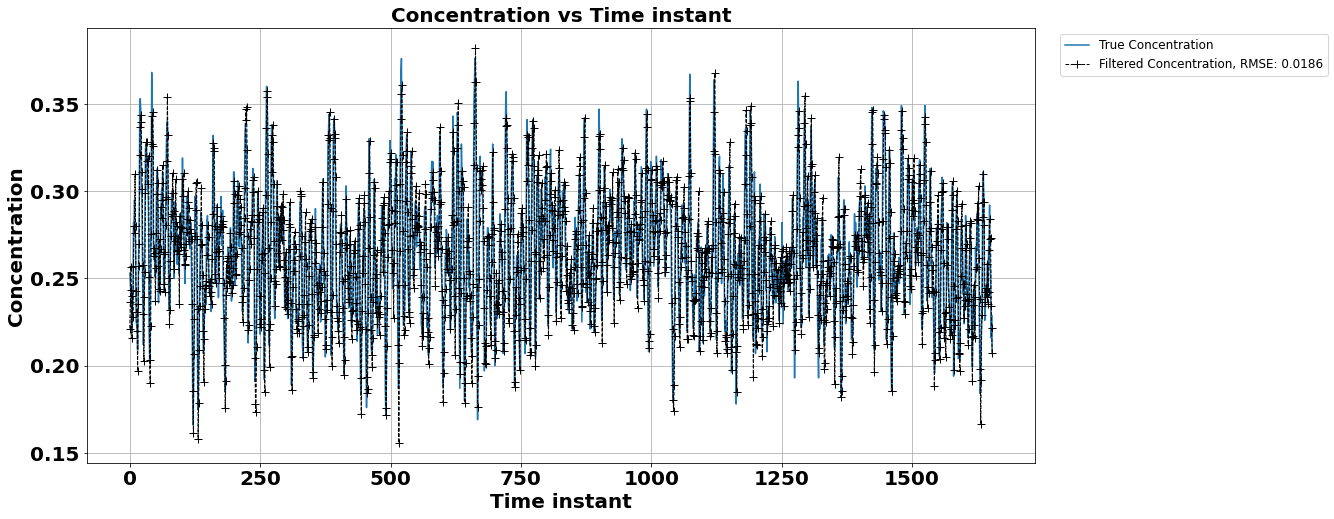

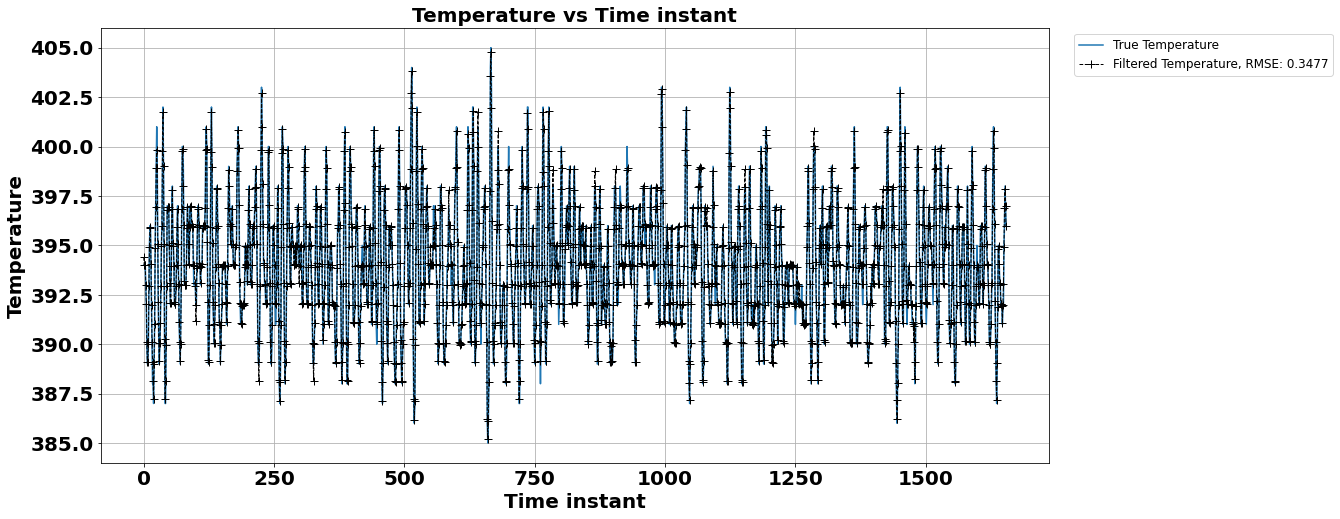

In [ ]:
time = np.arange(0,len(updated_predictions2[:1655,0]))

plt.figure(figsize=(17,8))
plt.plot(time,true_states[:1655,0],label='True Concentration')
#plt.plot(time,measured_states[:1655,0]*100,label='Plant_Height1')
#plt.plot(time,mech_EKF_result[1000:1655,0],label='Phy_EKF_Conc, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_conc),color='forestgreen')
plt.plot(time,updated_predictions2[:1655,0],'k+--',label='Filtered Concentration, RMSE: {0:.4f}'.format(RMSE_EKF_conc),linewidth=1,markersize=7.5)
#plt.plot([],[],label='RMSE Height1_EKF vs True_height1 = {0:.4f}'.format(RMSE_height1))
#plt.plot([],[],label='RMSE Height1_model vs True_height1 = {0:.4f}'.format(RMSE_height1_model))
#plt.legend(bbox_to_anchor=(1.55, 0.78),loc='lower right',fontsize=17)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.title('Concentration vs Time instant',fontsize=20, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x')
#plt.savefig('True vs filtered: Concentration vs Time instant.png',dpi=200,bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.figure(figsize=(17,8))
plt.plot(time,true_states[:1655,1],label='True Temperature')
#plt.plot(time,measured_states[:1655,0],label='Plant_Temp',linewidth=2)
#plt.plot(time,mech_EKF_result[1000:1655,1],label='Phy_EKF_Temp, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_temp),color='forestgreen')
plt.plot(time,updated_predictions2[:1655,1],'k+--',label='Filtered Temperature, RMSE: {0:.4f}'.format(RMSE_EKF_temp),linewidth=1,markersize=7.5)
#plt.legend(bbox_to_anchor=(1.55, 0.727),loc='lower right',fontsize=17)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.title('Temperature vs Time instant',fontsize=20, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x')
#plt.savefig('True vs filtered: Temperature vs Time instant.png',dpi=200,bbox_extra_artists=(lgd,), bbox_inches='tight')

###**Innovation plots**

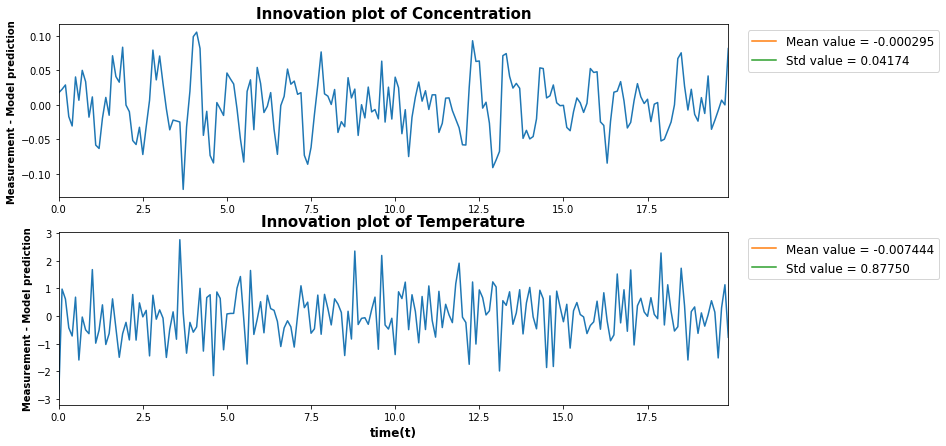

In [ ]:
t = 0.1*np.arange(len(model_predictions2[:200]))

plt.figure(1,figsize = (12,7))
#plt.plot(t,measured_states[:-1,0]-model_predictions2[:,0])

plt.subplot(211)
plt.plot(t,measured_states[:200,0]-model_predictions2[:200,0])
plt.plot([],[],label = "Mean value = %2.6f" % (np.mean(measured_states[:-1,0]-model_predictions2[:,0])))
plt.plot([],[],label = "Std value = %2.5f" % (np.std(measured_states[:-1,0]-model_predictions2[:,0])))
#plt.xlabel('time(t)',fontsize=12, fontweight='bold')
plt.ylabel('Measurement - Model prediction',fontsize=10, fontweight='bold')
plt.title('Innovation plot of Concentration',fontsize=15, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('conc_initial.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')


#plt.figure(2,figsize = (12,4))
#plt.plot(t,measured_states[:-1,1]-model_predictions2[:,1])
plt.subplot(212)
plt.plot(t,measured_states[:200,1]-model_predictions2[:200,1])
plt.plot([],[],label = "Mean value = %2.6f" % (np.mean(measured_states[:-1,1]-model_predictions2[:,1])))
plt.plot([],[],label = "Std value = %2.5f" % (np.std(measured_states[:-1,1]-model_predictions2[:,1])))
plt.xlabel('time(t)',fontsize=12, fontweight='bold')
plt.ylabel('Measurement - Model prediction',fontsize=10, fontweight='bold')
plt.title('Innovation plot of Temperature',fontsize=15, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('inno_initial data.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

###**Estimation Errors Plot**

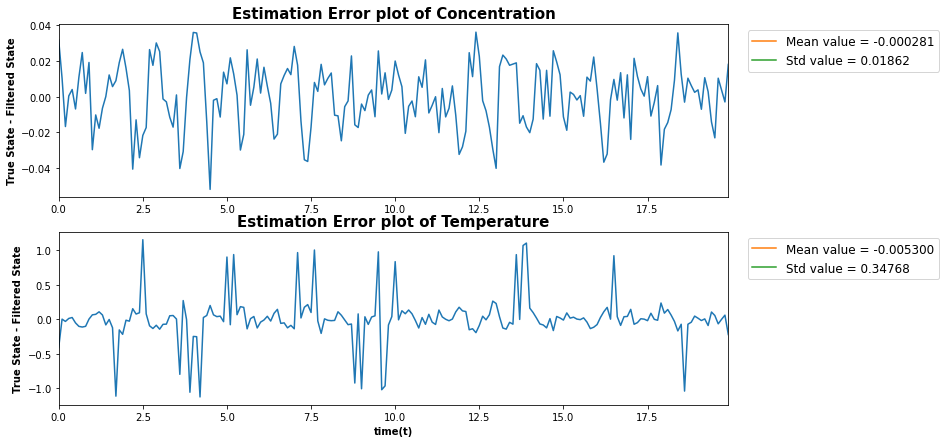

In [ ]:
t = 0.1*np.arange(len(updated_predictions2[:200]))

plt.figure(1,figsize = (12,7))
#plt.plot(t,true_states[:-1,0]-updated_predictions2[:,0])

plt.subplot(211)
plt.plot(t,true_states[:200,0]-updated_predictions2[:200,0])
plt.plot([],[],label = "Mean value = %2.6f" % (np.mean(true_states[:-1,0]-updated_predictions2[:,0])))
plt.plot([],[],label = "Std value = %2.5f" % (np.std(true_states[:-1,0]-updated_predictions2[:,0])))
#plt.xlabel('time(t)',fontsize=12, fontweight='bold')
plt.ylabel('True State - Filtered State',fontsize=10, fontweight='bold')
plt.title('Estimation Error plot of Concentration',fontsize=15, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('conc_initial.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')


#plt.figure(2,figsize = (12,4))
#plt.plot(t,true_states[:-1,1]-updated_predictions2[:,1])
plt.subplot(212)
plt.plot(t,true_states[:200,1]-updated_predictions2[:200,1])
plt.plot([],[],label = "Mean value = %2.6f" % (np.mean(true_states[:-1,1]-updated_predictions2[:,1])))
plt.plot([],[],label = "Std value = %2.5f" % (np.std(true_states[:-1,1]-updated_predictions2[:,1])))
plt.xlabel('time(t)',fontsize=10, fontweight='bold')
plt.ylabel('True State - Filtered State',fontsize=10, fontweight='bold')
plt.title('Estimation Error plot of Temperature',fontsize=15, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('est error_initial data.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

**To save the plots in Gdrive**

In [ ]:
# #!pip install --upgrade gupload

# from pydrive.auth import GoogleAuth
# from google.colab import auth

# # Authenticate and create the PyDrive client.
# auth.authenticate_user()

# !gupload --to '1qkLf5HHBEIbt-xHUq7hmxrAruEi-9vY2' *.png


Uploading file: est error_initial data.png
